# Sissejuhatus <a name="intro"></a>

Esimese Cartopy praktikumi jooksul tutvume
-  kaardiakna loomise ja kasutamisega;
-  projektsioonide ja nende parameetritega;
-  kaardi detailsuse ja kaardivõrgu konstrueerimisega;
-  kaardile teksti lisamisega.

Praktikumi lõpus teeme oskuste kinnistamiseks ka ise paar lihtsamat kartograafilist joonist.

1. [Kaardiakna juhtimine](#algus)<br>
    1.1 [Esimene kaardiaken](#aken)<br>
    1.2 [Projektsiooni parameetrid](#projpar)<br>
    1.3 [Kaardi detailsus ja kaardivõrk](#detailsus)<br>
    1.4 [Teksti lisamine](#tekst)<br>
    1.5 [Ülesanne](#ül1)

# 1 Kaardiakna juhtimine <a name="algus"></a>

##  1.1 Esimene kaardiaken <a name="aken"></a>

Cartopy kaardiaken põhineb Pythoni jooniste loomise teegi [Matplotlib](https://matplotlib.org/) teljestikul. Esmalt tuleks luua tühi joonis, millele seejärel lisada teljestik ja hiljem muud elemendid. Teegi Matplotlib puhul toimub see järgmiselt:

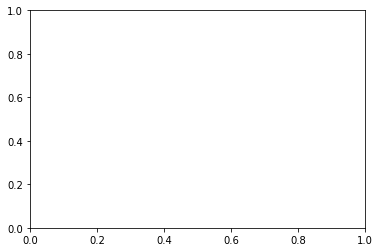

In [1]:
# %matplotlib inline tagab selle, et joonised kuvatakse automaatselt ilma käsku plot() kasutamata
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure() # uus joonis
ax = plt.axes() # uus teljestik

Esialgse kaardiakna loomine on analoogne, aga selleks, et kaardi elemendid oleks soovitud projektsioonis, tuleks teljestiku loomisel lisada ka vastava projektsiooni info. Cartopy projektsioonide moodulis [crs](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) on antud juhendi loomise hetkel 33 erineva projektsiooni andmed, mille hulgas peaks olema kõik enam levinud kaardiprojektsioonid.<br><br>
Loome näiteks kaardiakna, mis kujutab maailma rannajoont [Lamberti (õigepindses) silindrilises projektsioonis](https://en.wikipedia.org/wiki/Lambert_cylindrical_equal-area_projection). Selleks loome uue objekti <code>proj</code>, mis hoiab soovitud projektsiooni infot. Vastava projektsiooni käsu <code>LambertCylindrical()</code> leiab eelnevalt viidatud mooduli käskude nimekirjast. Seejärel rakendame seda objekti uue teljestiku loomise käigus ja lisame projektsiooni mõju hindamiseks tühjale aknale käsuga <code>coastlines</code> rannajoone.

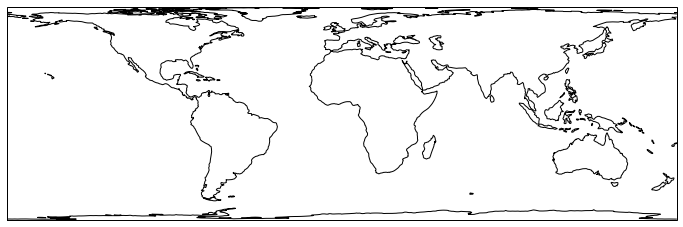

In [2]:
import cartopy.crs as ccrs # cartopy projektsioonide mooduli import

plt.figure(figsize=(12, 9)) # figsize määrab joonise suuruse
proj = ccrs.LambertCylindrical() # objekt, mis hoiab projektsiooni infot
ax = plt.axes(projection=proj) # projektsioonis teljestik
ax.coastlines() # maailma rannajoon

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 1.2 Projektsiooni parameetrid <a name="projpar"></a>

Antud näite puhul jäid käsu <code>LambertCylindrical()</code> rakendamise käigus sulud tühjaks, mis tähendab, et kasutati moodulis vaikimisi määratud parameetreid. Tegelikult on käsul olemas parameeter <code>central_longitude</code> (vaikimisi väärtus 0.0), mille abil saab muuta telgmeridiaani asukohta.

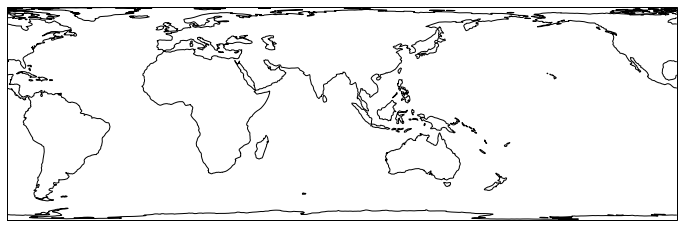

In [3]:
plt.figure(figsize=(12, 9))
ax = plt.axes(projection=ccrs.LambertCylindrical(central_longitude=90)) # uus telgmeridiaan
ax.coastlines()

Mooduli [crs](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html) käskude nimekirja sirvides on näha, et enamasti on projektsioonidel rohkem kui üks parameeter ja seega on vajadusel sõltuvalt projektsioonist võimalik korrigeerida ka näiteks standardparalleelide või mõõtkavateguri väärtusi.<br><br>
Üritame järgnevalt luua Albersi õigepindses koonilises projektsioonis kaardi, mis kujutab Euroopat. Standardparalleelide ja telgmeridiaani paigutamisel on abiks [spatialreference.org](http://spatialreference.org/), kust leiab nii [antud projektsiooni](http://spatialreference.org/ref/esri/europe-albers-equal-area-conic/html/) kui ka paljude teiste globaalsete ja regionaalsete projektsioonide parameetrid.

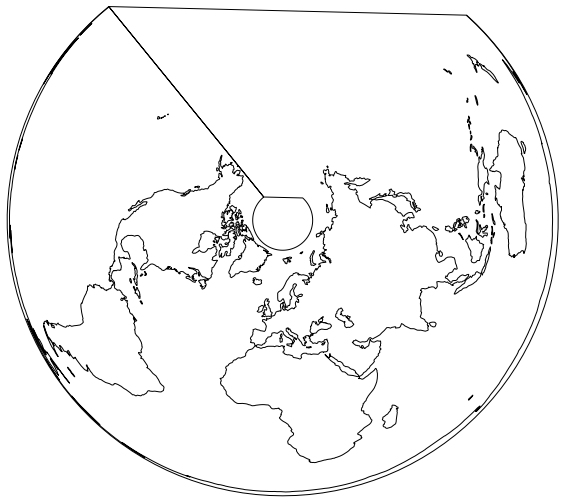

In [4]:
plt.figure(figsize=(12, 9))
proj = ccrs.AlbersEqualArea(central_longitude=10, central_latitude=30, standard_parallels=(43, 62))
ax = plt.axes(projection=proj)
ax.coastlines()

Kuna soovime näha Euroopat, siis tuleks käsu <code>set_extent()</code> abil määrata mingi mõistlik kaardiakna ulatus, et hetkel üleliigne osa maailmast välja jätta. Info käsu kasutamise kohta on [siin](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=set_extent#cartopy.mpl.geoaxes.GeoAxes.set_extent). Ulatuse määramine muudab nii kujutise mõõtkava kui kaardiraami kuju. Näiteks muutub antud juhul kooniline raam ristkülikuks. Globaalse ulatuse saab taastada käsuga <code>set_global()</code>.

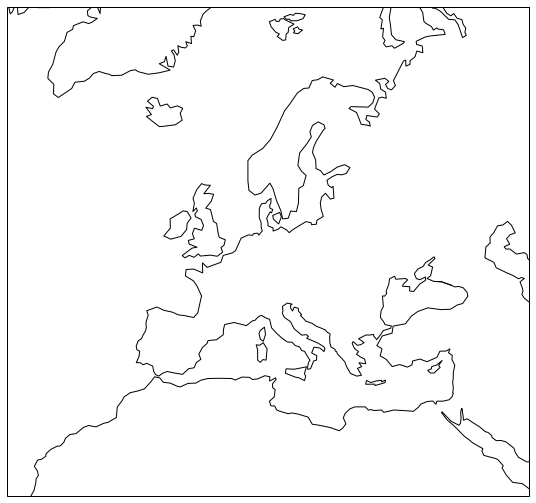

In [5]:
plt.figure(figsize=(12, 9))
ax = plt.axes(projection=proj)
ax.coastlines()

extent = (-20, 40, 20, 80) # ulatus kujul (x0, x1, y0, y1)
ax.set_extent(extent)

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 1.3 Kaardi detailsus ja kaardivõrk <a name="detailsus"></a>

Eelmises kaardiaknas oli mõõtkava 1:110000000, mis on Cartopy vaikimisi määratud väärtus. Kui antud mõõtkava sobib hästi maailmakaardi jaoks, siis Euroopa puhul võiks pilt olla teravam. Detailsuse uurimiseks loome esmalt kaardi, mis kujutab Eesti piirkonda meie riiklikus, Lamberti konformses koonilises projektsioonis L-EST97, mille parameetrid leiab [siit](http://spatialreference.org/ref/epsg/3301/html/). Nagu näha, siis tuleks seekord täpsustada ka lähtepunkti ristkoordinaadid (x0, y0), millele vastavad [parameetrid](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#lambertconformal) on <code>false_easting</code> ja <code>false_northing</code>.

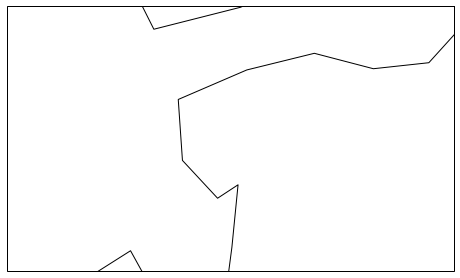

In [6]:
plt.figure(figsize=(8, 6))
proj = ccrs.LambertConformal(
    central_longitude=24, central_latitude=57.51755393055556, false_easting=500000, false_northing=6375000, 
    standard_parallels=(58, 59.33333333333334)
)
extent = (20.37, 28.2, 57.52, 60)
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_extent(extent)

Kasutame nüüd vastavat parameetrit, et parandada Eesti rannajoone resolutsiooni. Hetkel on võimalik valida kolme erineva detailsuse astme vahel (1:10000000, 1:50000000 või 1:110000000). Tasub märkida, et kõrge resolutsiooni kasutamine globaalse ulatusega kaartide puhul mõjutab joonise kuvamise kiirust, kuna Cartopy ja teised analoogsed Pythoni teegid teevad oma arvutused mälus.

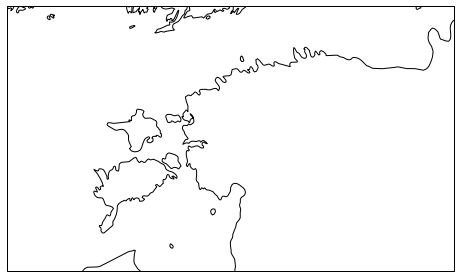

In [7]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=proj)
ax.coastlines(resolution='10m') # resolutsiooni parameeter ('10m', '50m' või '110m')
ax.set_extent(extent)

Võtame nüüd vaatluse alla kaardivõrgu konstrueerimise Mollweide projektsiooni näitel. Selleks puhuks on olemas käsk <code>gridlines</code>, mis määrab projektsioonile vaikimisi mingi teatud vahemikuga võrgustiku.

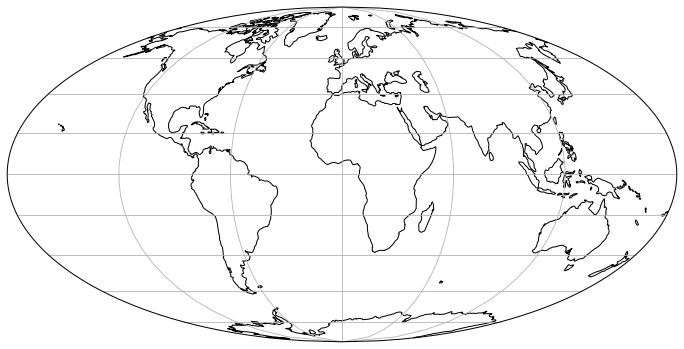

In [8]:
plt.figure(figsize=(12, 9))
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.coastlines()

gl = ax.gridlines() # võrgustiku objekt

Soovi korral saab meridiaanide ja paralleelide vahemikku vastavalt parameetrite <code>xlocs</code> ja <code>ylocs</code> abil muuta. Lisaks võib korrigeerida võrgujoonte laiust, värvi jms. Kahjuks on hetkel võimalik võrgule lisada meridiaanide ja paralleelide silte (parameeter <code>draw_labels=True</code>) vaid kahe projektsiooni (Mercator ja PlateCarree) puhul.

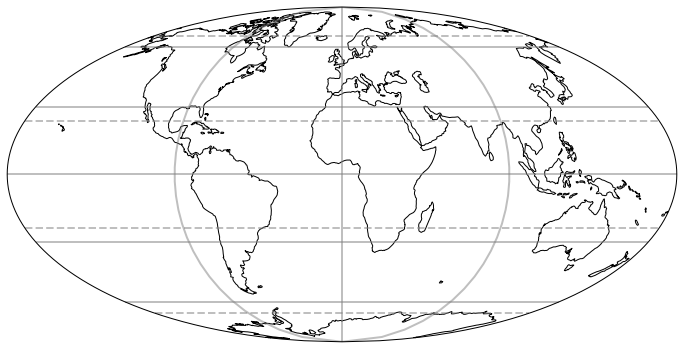

In [9]:
plt.figure(figsize=(12, 9))
ax = plt.axes(projection=proj)
ax.coastlines()

# Meridiaanid vahemikus [-180, -90, 0, 90, 180]
xlocs = [-180, -90, 0, 90, 180]

# Paralleelid vahemikus -90 kuni 90, 30-kraadise intervalliga
ylocs = []
i = -90
while i <= 90:
    ylocs.append(i)
    i += 30

# Lisame võrgu
gl = ax.gridlines(xlocs=xlocs, ylocs=ylocs, linewidth=2, color='gray', alpha=0.5)

# Eraldi saab lisada ka mitu võrku, nt kui on vaja lisada pöörijooned
tropics = ax.gridlines(ylocs=[-66.5, -23.43691, 23.43691, 66.5], linewidth=2, linestyle='--', color='gray', alpha=0.5)
tropics.xlines=False # peidame teise võrgu meridiaanid

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 1.4 Teksti lisamine <a name="tekst"></a>

Kuigi lisadetailide konstrueerimist käsitleb täpsemalt järgmine Cartopy juhend, vaatame enne seda üle teksti lisamise kaardile selleks, et me saaks oma joonise allkirjastada. Teksti lisamine toimub käsu [text()](https://matplotlib.org/users/text_props.html) abil ja sõltuvalt sellest, kas tekst asub kaardiraami sees või väljas, tuleb kasutada erinevaid parameetreid. Kui tekst asub raami sees, tuleks asukoht määrata geograafiliste koordinaatide kaudu. Sellisel juhul peab parameetri transform väärtus olema <code>Geodetic()</code> või <code>PlateCarree()</code>, kuna vastasel juhul ei saa Cartopy aru, et tegemist on geograafiliste koordinaatidega. Raamisiseste koordinaatide puhul on vastav parameeter aga <code>transAxes</code>.<br><br>
Nüüd tasub üle vaadata ka joonise salvestamine käsu [savefig()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html) abil. Joonise formaadi (PNG, PDF jne) saab määrata faili nime laiendiga. Parameeter <code>dpi</code> täpsustab faili resolutsiooni.

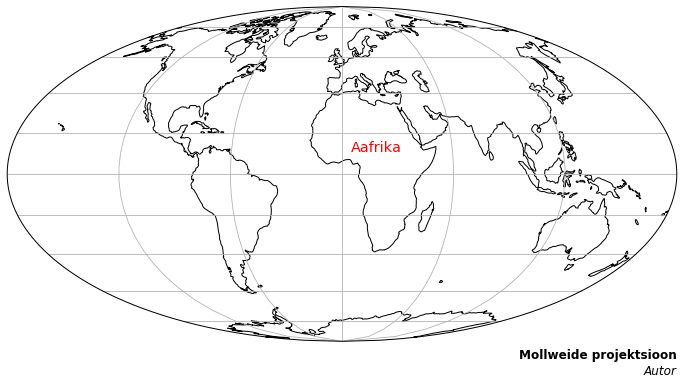

In [10]:
plt.figure(figsize=(12, 9))
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.coastlines()
gl = ax.gridlines()

# Raamisisene tekst
ax.text(5, 10, 'Aafrika', transform=ccrs.Geodetic(), color='red', size='x-large')

# Raamiväline tekst
ax.text(1, -0.05, 'Mollweide projektsioon', transform=ax.transAxes, ha='right', size='large', weight='bold')
ax.text(1, -0.1, 'Autor', transform=ax.transAxes, ha='right', size=12, style='italic')

# Salvestamine
plt.savefig('mollweide.png', dpi=200)

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>

## 1.5 Ülesanne <a name="ül1"></a>

Ürita antud juhendile tuginedes luua ja salvestada kaks joonist.<br><br>
Esimene võiks olla maailmakaart, mis täidab järgmised nõuded:
-  on mingis antud juhendis veel käsitlemata projektsioonis;
-  sellele on lisatud kaardivõrk, mis ei kasuta Cartopy vaikimisi määratud parameetreid;
-  kaardile on käsu <code>add_feature</code> abil lisatud vähemalt kaks (nt rannajoon ja meri) täiendavat kihti (vt alumist näidet ja [siit](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html?#cartopy.feature.cartopy.feature.BORDERS));
-  lisatud on projektsiooni ja autori nimi.

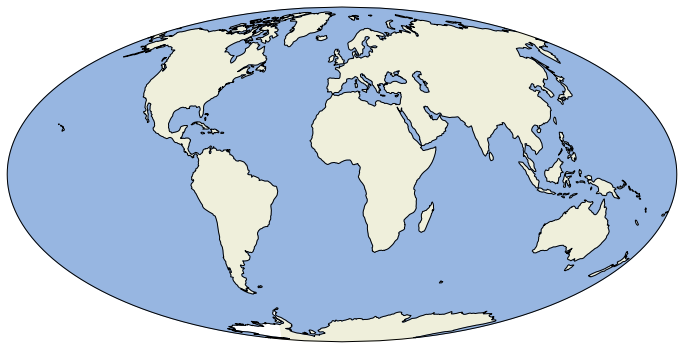

In [11]:
import cartopy.feature as cfeature

plt.figure(figsize=(12, 9))
ax = plt.axes(projection=proj)
ax.coastlines()
ax.add_feature(cfeature.LAND) # maismaa
ax.add_feature(cfeature.OCEAN) # meri

In [12]:
# Esimese joonise kood

Teine joonis kujutab mingit piirkonda ja täidab järgmised nõuded:
-  piirkond ei ole Eesti ega Euroopa (võib olla aga osa Euroopast);
-  joonise resolutsioon on 1:10000000;
-  sellele on lisatud kaardivõrk;
-  käsu <code>add_feature</code> abil on lisatud vähemalt riigipiirid;
-  lisatud on projektsiooni ja autori nimi.

In [13]:
# Teise joonise kood

<div style="text-align:right">
    <a href="#intro">algusesse</a>
</div>